In [30]:
import torch
import torch.nn as nn
conv = nn.Conv2d(3, 16, kernel_size =3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [31]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [32]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train = True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

from torchvision import transforms

transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                            (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                            (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [33]:
label_map = {0: 0 , 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
         for img, label in transformed_cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
             for img, label in cifar10_val
             if label in [0,2]]

img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

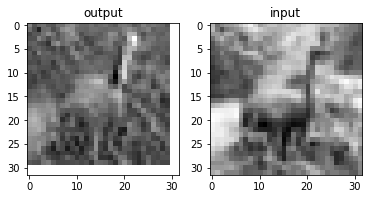

In [34]:
from matplotlib import pyplot as plt
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap ='gray')
plt.subplot(1, 2, 2, sharex = ax1, sharey = ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [35]:
conv = nn.Conv2d(3 ,1 , kernel_size = 3, padding = 1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [36]:
with torch.no_grad():
    conv.bias.zero_()
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

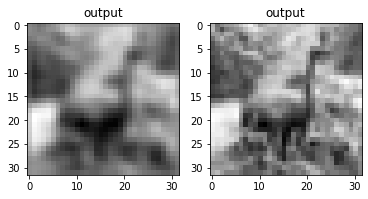

In [37]:
output = conv(img.unsqueeze(0))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex = ax1, sharey = ax1)
plt.imshow(img.mean(0), cmap= 'gray')
plt.title('output')
plt.show()

In [38]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding =1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],[-1.0, 0.0, 1.0],[-1.0, 0.0, 1.0]])
    conv.bias.zero_()

In [111]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [78]:
model = 

RuntimeError: The size of tensor a (8) must match the size of tensor b (6) at non-singleton dimension 0

In [86]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 3, padding = 1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16,8, kernel_size = 3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Linear(8*8*8, 32),
            nn.Tanh(),
            nn.Linear(32,2)
)

In [87]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [88]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [133]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8, kernel_size = 3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,2)
        
    def forward(self,x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [134]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [135]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(16,8, kernel_size = 3, padding=1)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1, 8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [136]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [176]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0798,  0.1167]], grad_fn=<AddmmBackward0>)

In [146]:
import datetime
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if  epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))
            

In [147]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader)

2022-03-15 13:45:55.347107 Epoch 1, Training loss 0.5941164670096841
2022-03-15 13:46:17.659669 Epoch 10, Training loss 0.3302112870914921
2022-03-15 13:46:42.413986 Epoch 20, Training loss 0.3013237175668121
2022-03-15 13:47:07.134317 Epoch 30, Training loss 0.2768332292889334
2022-03-15 13:47:32.129900 Epoch 40, Training loss 0.2539997149235124
2022-03-15 13:47:56.900806 Epoch 50, Training loss 0.23707330995684217
2022-03-15 13:48:21.700822 Epoch 60, Training loss 0.22019499497618644
2022-03-15 13:48:46.472423 Epoch 70, Training loss 0.20556748506559688
2022-03-15 13:49:11.269405 Epoch 80, Training loss 0.1890409088153748
2022-03-15 13:49:35.929556 Epoch 90, Training loss 0.17390324754320133
2022-03-15 13:50:00.671864 Epoch 100, Training loss 0.1596665245712183


In [148]:
ttrain_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle = False)
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
            print("Accuracy {}: {:.2f}".format(name, correct / total))

In [149]:
validate(model, ttrain_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.88


In [151]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [153]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [155]:
data_path

'../data-unversioned/p1ch7'

In [197]:
class NetWidth(nn.Module):
    def __init__(self,n=32):
        super().__init__()
        self.n = n
        self.conv1 = nn.Conv2d(3, n, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n, n//2, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(8*8*n//2, 32)
        self.fc2 = nn.Linear(32,2)
        
    def forward(self, x):
            out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
            out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
            out = out.view(-1,8*8*self.n//2)
            out = torch.tanh(self.fc1(out))
            out = self.fc2(out)
            return out

In [160]:
model = NetWidth(32)
sum(p.numel() for p in model.parameters())

38386

In [187]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            l2_lambda = 0.001
            norm = sum(p.pow(2.0).sum() for p in model.paramters())
            loss = loss + norm * l2_lambda
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if  epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))
            

In [199]:
class NetWidth(nn.Module):
    def __init__(self,n=32):
        super().__init__()
        self.n = n
        self.conv1 = nn.Conv2d(3, n, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n, n//2, kernel_size = 3, padding = 1)
        self.dropout1 = nn.Dropout2d(p=0.4)
        self.dropout2 = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8*8*n//2, 32)
        self.fc2 = nn.Linear(32,2)
    def forward(self, x):
            out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
            out = self.dropout1(out)
            out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
            out = self.dropout2(out)
            out = out.view(-1,8*8*self.n//2)
            out = torch.tanh(self.fc1(out))
            out = self.fc2(out)
            return out

In [216]:
class NetWidth(nn.Module):
    def __init__(self,n=32):
        super().__init__()
        self.n = n
        self.conv1 = nn.Conv2d(3, n, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n, n//2, kernel_size = 3, padding = 1)
        self.batchnorm1 = nn.BatchNorm2d(num_features = n)
        self.batchnorm2 = nn.BatchNorm2d(num_features = n//2)
        self.fc1 = nn.Linear(8*8*n//2, 32)
        self.fc2 = nn.Linear(32,2)
        
    def forward(self, x):
        out = self.batchnorm1(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out),2)
        out = self.batchnorm2(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out),2)
        out = out.view(-1,8*8*self.n//2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [218]:
model = NetWidth(n=32)
model(img.unsqueeze(0))

tensor([[-0.2941, -0.0973]], grad_fn=<AddmmBackward0>)

In [220]:
class NetDepth(nn.Module):
    def __init__(self,n=32):
        super().__init__()
        self.n = n
        self.conv1 = nn.Conv2d(3, n, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n, n//2, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(n//2, n//2, kernel_size = 3, padding =1)
        
        self.fc1 = nn.Linear(4*4*n//2, 32)
        self.fc2 = nn.Linear(32,2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)),2)
        out = F.max_pool2d(torch.relu(self.conv2(out)),2)
        out = F.max_pool2d(torch.relu(self.conv3(out)),2)
        out = out.view(-1,4*4*self.n//2)
                           
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [221]:
class NetDepth(nn.Module):
    def __init__(self,n=32):
        super().__init__()
        self.n = n
        self.conv1 = nn.Conv2d(3, n, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n, n//2, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(n//2, n//2, kernel_size = 3, padding =1)
        
        self.fc1 = nn.Linear(4*4*n//2, 32)
        self.fc2 = nn.Linear(32,2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)),2)
        out = F.max_pool2d(torch.relu(self.conv2(out)),2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out) + out1),2)
        out = out.view(-1,4*4*self.n//2)
                           
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [222]:
class ResBlock(nn.Module):
    def __init__(self, n):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n, n, kernel_size =3, padding = 1, bias =False)
        self.batch_norm = nn.BatchNorm2d(num_features = n)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity = 'relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
        
    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [224]:
class NetResDeep(nn.Module):
    def __init__(self, n):
        super(ResBlock, self).__init__()
        self.n = n
        self.conv = nn.Conv2d(3, n, kernel_size = 3, padding =1)
        self.resblocks = nn.Sequential(*(n * [ResBlock(n = n)]))
        self.fc1 = nn.Linear(8*8*n,32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv(x)),2)
        out = self.resblocks(out)
        out = F.max_pool2d(out,2)
        out = out.view(-1, 8*8*self.n)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out